In [1]:
#import important libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

/var/folders/yf/q5hy0j9s5td1mjcljsx68fxh0000gq/T/ipykernel_21159/4084085958.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Firing neurons and excitable systems FitzHugh-Nagumo model

The goal of this exercise is to study a prototype model that describes the membrane potential of a neuron. The FitzHugh-Nagumo model is a 2D simplification of the famous Hodgkin-Huxley (HH) model that was developed in the late 1940's when the two scientists performed their seminal electrophysiology work on the giant squid axon that later led to the Nobel Prize. The HH model describes the time-dependent voltage $V(t)$ across a cell
membrane as:
$$C_m \frac{dV}{dt}=-\frac{V-V_{eq}}{R} +I_{tot}$$
where $C_m$ is the membrane capacitance, $R$ the resistance, $V_{eq}$ the resting potential and $I_{tot}$
the current. The resistance is dependent on the characteristics of each ion channel  (sodium, potassium, etc.).

## FitzHugh-Nagumo model (pencil & Python)

The FitzHugh Nagumo model (https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model) keeps some essential characteristics of the HH model and is the  following:
\begin{eqnarray*}
\dot{v} &=& -av + v^2 - v^3/3 -w  \\
\dot{w} &=& \epsilon (v - \gamma w)  \\
\end{eqnarray*}

where $v$ describes the membrane potential of the cell and $w$ is a slower variable (for small values of $\epsilon$) that describes the conductance of the potassium channel. We will take the parameters $\epsilon = 0.08$  and $\gamma = 1$ as constants and vary the parameter $a$: 

   Case A: $a = 0.2$
   
   Case B: $a = -0.2$

For this first exercise answer each question for both cases A and B.


#### 1) Study the phase plane.

  1. Find the nullclines and their intersections with the $v$ axis.
  
  2. Find the fixed points.
  
  3. Determine the stability of the fixed points.
  
  4. When does the fixed point change its stability?

#### Answers:

>1.1)⠀The nullclines are
\begin{eqnarray*}
\dot{v} = 0  &\Leftrightarrow &  w = -av + v^2 - v^3/3 \\
\dot{w} = 0  &\Leftrightarrow &  w = \dfrac{1}{\gamma}v \\
\end{eqnarray*}

>To find the intersections of the $v$ nullcline with the $v$ axis,  solve: $0 = -av + v^2 - v^3/3$.

>This gives $v_1 = 0$ and two other roots :  
$$v_{2,3} = \frac{3\pm\sqrt{9-12a}}{2} $$

>Case A : $a = 0.2$
The two other roots are positive : 
$\sim 0.22$ and $\sim 2.78$


>Case B: $a = -0.2$
One root is positive, the other is negative.
$\sim -0.19$ and $\sim 3.19$ 

***
>1.2)⠀In order to find the intersections between the nullclines (and then the fixed points), we solve the system :
\begin{eqnarray*}
\left \lbrace
\begin{array}{l}
w = -av + v^2 - v^3/3  \\
w = \dfrac{1}{\gamma}v \\
\end{array}\right.
\end{eqnarray*}
>which gives: 

>$(v_1^*,w_1^*) = (0,0)$ plus maybe two other roots.
To find the other roots, we solve $v^2-3v+3(a+\dfrac{1}{\gamma})=0$ which has solutions only if $\tau^2-4\Delta$ is non negative, so only if $a \leq \dfrac{3}{4}-\dfrac{1}{\gamma} = -0.25$, which is not the case. Thus, there is only one fixed point.


>Case A : $a = 0.2$. There is only one fixed point in $(0,0)$.

>Case B: $a = -0.2$. Idem.

***
>1.3)⠀Stability of the fixed point: it depends on the value of the eigenvalues of the Jacobian computed at the fixed point.
\begin{eqnarray*}
J &=& \left[ 
\begin{array}{cc}
\dfrac{d\dot{v}}{dv} & \dfrac{d\dot{v}}{dw} \\
\dfrac{d\dot{w}}{dv} & \dfrac{d\dot{w}}{dw} \\
\end{array}
\right] = 
\left[
\begin{array}{cc}
-a + 2v - v^2 & -1 \\
\epsilon & - \epsilon \gamma \\
\end{array}
\right] \\
J^* &=&  \left[
\begin{array}{cc}
-a  & -1 \\
\epsilon & - \epsilon \gamma \\
\end{array}
\right] \\
\end{eqnarray*}

>Defining $\Delta \doteq det(J^*)$ and $\tau \doteq tr(J^*)$ we have:

>$\Delta = a \epsilon \gamma + \epsilon > 0  \Rightarrow$ the eigenvalues have the same sign.

>$\tau = -a - \epsilon \gamma$  is negative only if $a > - \epsilon \gamma =  -0.08$.


>Case A : $a = 0.2$. The fixed point is stable (negative trace).

>Case B: $a = -0.2$. The fixed point is unstable (positive trace).

***
>1.4)⠀The stability changes when the trace change its sign _i.e._ when $a = - \epsilon \gamma$

#### 2) Plot the complete phase portrait.
  1. Plot the nullclines  in the phase plane ($v$,$w$).
  2. Show the fixed points and their stability.
  3. Plot the vector field (`matplotlib.pyplot.quiver` function is suitable for this).
  4. Choose a few representative initial conditions and plot the corresponding trajectories (look at `scipy.integrate.odeint` function for integration). Hint: generate and plot trajectories for 10 evenly spaced initial conditions on the circle $v^2+w^2=0.5^2$ with radius 0.5. 
  5.  Discuss the similarities and the differences between the two cases. Try to understand what, in the geometry of the nullclines, makes the difference (hint: look at the nullclines around the fixed point).
  6. In case A, you should see two different "types" of trajectories. Discuss what are these types and the meaning of the word "excitable".

#### Answers:

>2.1)-2.4) See code below for the graphical solution. 


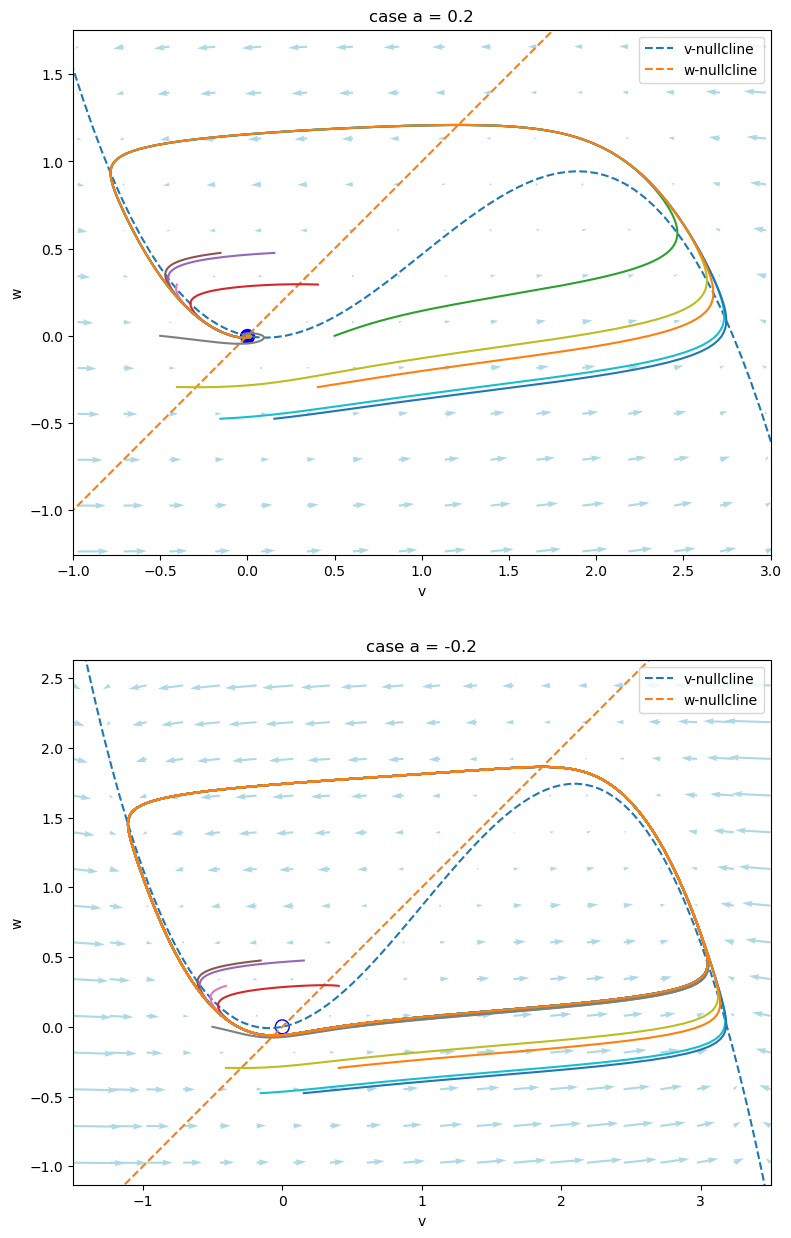

In [2]:
from scipy.integrate import odeint

def Xdot(X,t,a): # remember: t is not directly used in the function, 
                 # but it is useful when passing the function to odeint for integration (see below)
    v = X[0]
    w = X[1]
    dv = -a*v+v**2-v**3/3-w 
    dw = epsilon*(v-gamma*w)
    return np.array([dv, dw])

epsilon = 0.08
gamma = 1.
v = np.linspace(-2,3.5,100)
w = np.linspace(-2,3.5,100)
dt = 0.1
T = 100
t = np.arange(0,T,dt)
# generate initial conditions on a circle with cosine and sine
thetaArr = np.linspace(0,2*np.pi,10, endpoint = False)
X0Arr = np.array([[0.5*np.cos(theta), 0.5*np.sin(theta)] for theta in thetaArr])

fig,axs = plt.subplots(2, 1,figsize=(9,15)) 

for i,a in enumerate([0.2, -0.2]):
    axs[i].set_title('case a = ' + str(a))
    
    # nullclines
    n1 = -a*v+v**2-v**3/3
    n2 = 1/gamma*v
    axs[i].plot(v, n1, ls = '--', label = 'v-nullcline')
    axs[i].plot(v, n2, ls = '--', label = 'w-nullcline')
    
    # fixed points
    axs[i].scatter(0,0, color = 'blue', s = 100, facecolor = 'none' if a<0 else 'blue')
    
    # vector field
    domain = np.linspace(-1.5,3.5,20) # reduce resolution not to have too many arrows
    
    x, y = np.meshgrid(domain, domain) # grid for both coordinates
    
    dx, dy = Xdot([x,y],t,a) # compute the derivatives for all points of the grid
    
    axs[i].quiver(x,y,dx,dy, color = "lightblue") 
    
    # trajectories
    for X0 in X0Arr:
        traj = odeint(Xdot, X0, t, args=(a,))
        axs[i].plot(traj[:,0], traj[:,1])
        
    # plot options
    axs[i].set(xlabel='v', ylabel='w')
    axs[i].axis('equal') # same scale on both axes (better in order to see the initial conditions on the circle)
    axs[i].legend(loc='upper right')
    
# set axis limits (these conditions are not "strict" because of the request to maintain the same scale on both axes)    
axs[0].axis([-1., 3.,-0.5, 1.])
axs[1].axis([-1.5, 3.5,-0.5, 2.])
plt.show()

***
>2.5) In case B, $(0,0)$ is an unstable fixed point and the system presents a limit cycle; in case A, $(0,0)$ is a stable fixed point. Depending on the value of $a$, the slope of the $v$ nullcline  changes at the fixed point: negative if $a = 0.2$ (Case A) and positive if $a = -0.2$ (Case B). This change in the slope (so, whether the f.p. is located in the "descending" or "ascending" branch of the $v$ nullcline) is linked to the change of stability of the fixed point. Look at the plot below, which is just a zoom of the phase plane nearby the fixed point.


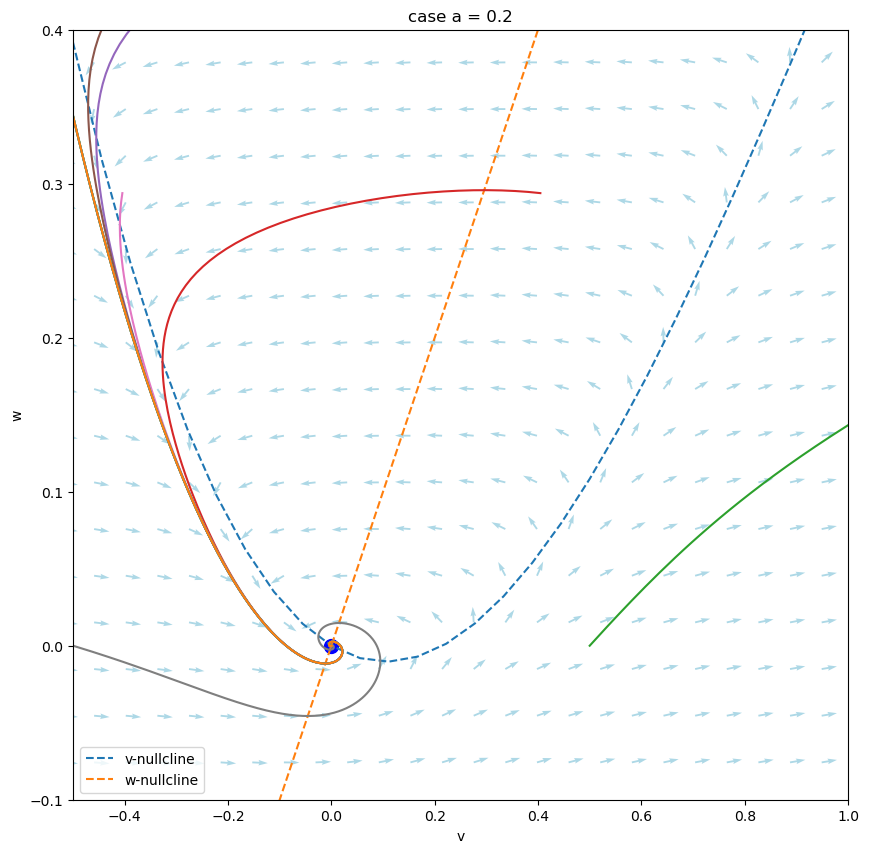

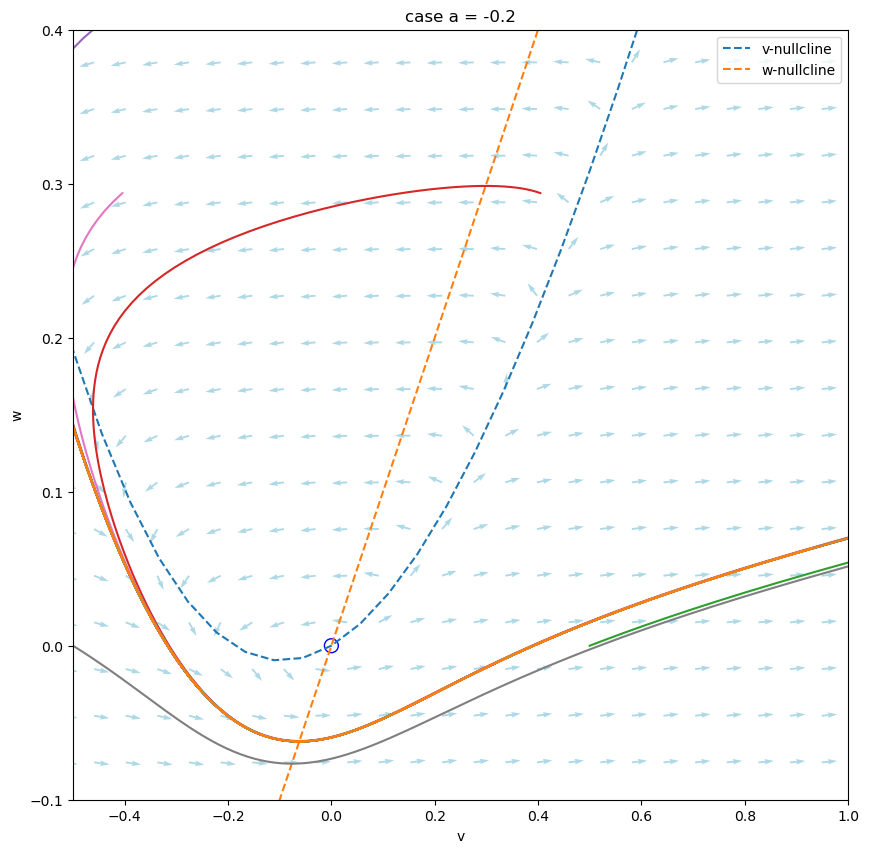

In [3]:
for a in [0.2, -0.2]:
    
    plt.figure(figsize=(10,10))
    plt.title('case a = ' + str(a))
    
    #nullcllines
    n1 = -a*v+v**2-v**3/3
    n2 = 1/gamma*v
    plt.plot(v, n1, ls = '--', label = 'v-nullcline')
    plt.plot(v, n2, ls = '--', label = 'w-nullcline')
    
    #fixed points
    plt.scatter(0,0, color = 'blue', s = 100, facecolor = 'none' if a==-0.2 else 'blue')
    
    #vector field
    domain_x = np.linspace(-1.5,1.5,50) #reduce resolution not to have too many arrows
    domain_y = np.linspace(-1.5,1.5,100)
    
    x, y = np.meshgrid(domain_x, domain_y) #grid for both coordinates
    dx, dy = Xdot([x,y],t,a) #compute the derivatives for all points of the grid
    
    #normalize vectorfield
    temp = dx/(dx**2+dy**2)**0.5 
    dy = dy/(dx**2+dy**2)**0.5
    dx = temp
    plt.quiver(x,y,dx,dy, scale = 50, color = "lightblue") 
    
    #trajectories
    for X0 in X0Arr:
        traj = odeint(Xdot, X0, t, args=(a,))
        plt.plot(traj[:,0], traj[:,1])
        
    #plot options
    plt.xlim([-0.5, 1.])
    plt.ylim([-0.1, 0.4])
    plt.xlabel('v')
    plt.ylabel('w')
    plt.legend()
    plt.show()

***
>2.6) In case A, two types of trajectories are visible depending on the initial conditions: (i) those quickly reaching the fixed point and (ii) those performing large excursions before reaching the fixed point. So, in case (i) the system is rapidly driven at the stable fixed point; in case (ii) the perturbation causes a long-lasting strong response in the system. Because of this feature, this model is an example of excitable system with a threshold-like behaviour.

#### 3) Plot a few trajectories in function of time.

  1. For both cases, choose two (or more) initial conditions among the ones you have plotted in the answer to question 2.4 and plot the corresponding trajectories. For case A choose initial conditions giving rise to different "types" of trajectories in the phase space (according to your answer to question 2.6).  
  2. Comment on the properties of the trajectories for cases A and B. In particular, how do you explain the "jumps" in the values of $v$ and $w$?
  3. Let's consider case A. Discuss excitable systems in connection with neural excitations (or action potentials).

#### Answers:

>3.1) See the python code below. 

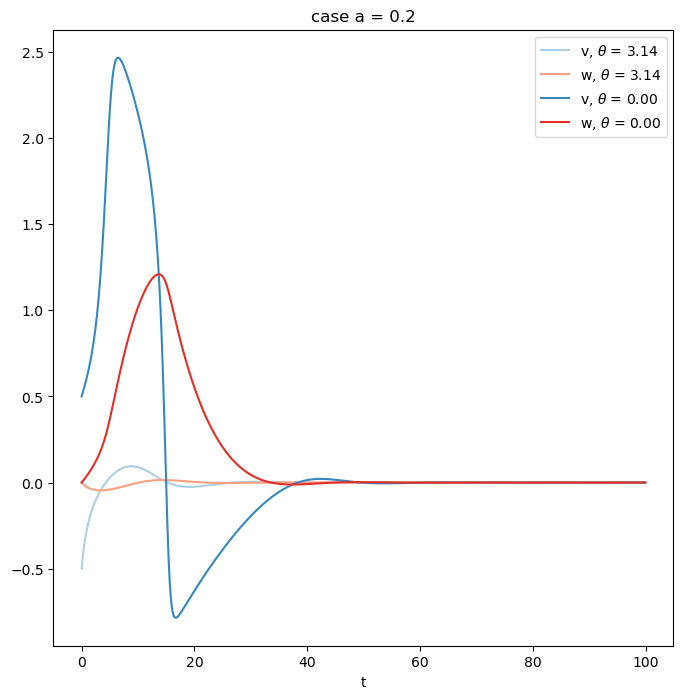

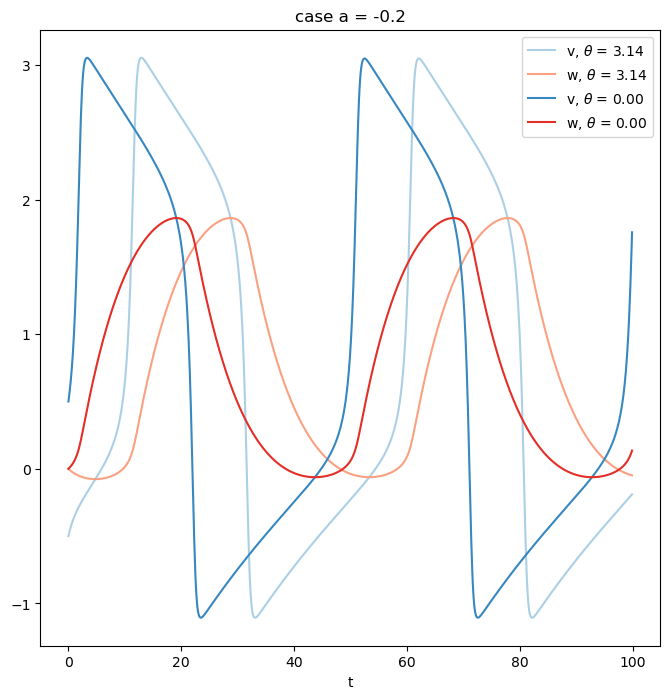

In [4]:
#choose color palette for v and w 
import seaborn as sns
color_v = sns.color_palette("Blues", 2)
color_w = sns.color_palette("Reds", 2)

thetaArr = np.array([np.pi,0.])
X0Arr = np.array([[0.5*np.cos(theta), 0.5*np.sin(theta)] for theta in thetaArr])

for a in [0.2, -0.2]:
    plt.figure(figsize=(8,8))
    plt.title('case a = ' + str(a))
    
    #trajectories
    for i, X0 in enumerate(X0Arr):
        traj = odeint(Xdot, X0, t, args=(a,))
        plt.plot(t, traj[:,0], label = r'v, $\theta$ = %.2f' % thetaArr[i], color = color_v[i])
        plt.plot(t, traj[:,1], label = r'w, $\theta$ = %.2f' % thetaArr[i], color = color_w[i])
        
    plt.xlabel('t')
    
    #plt.ylim([-1.5, 1.5])
    
    plt.legend()
    plt.show()

***
>3.2) The "jumps" in the trajectories of A and B can be explained by looking at the phase plane you have plotted before: you may notice that the velocity field is mainly parallel to the $v$-axis, due to the small $\epsilon$ factor, except near the $v$-nullcline, where the velocity is very small and parallel to the nullcline. This "forces" the trajectories to jump from one branch to the other of the $v$-nullcline, for an infinite time in case B, giving rise to an oscillatory behaviour, and for only once in case A, before reaching the fixed point. 

***
>3.3) In case A, the trajectory of $v$ for $\theta = 0$ is reminiscent of an action potential of a neuron: a perturbation of the stable configuration of the neuronal membrane can cause a complete depolarization of the whole membrane, followed by short hyper-polarization, resulting in the generation of a strong spiking signal before returning in the stable configuration. 
For other initial conditions (see $\theta=\pi$ in the plot above) the oscillation is very small. This is again reminiscent of neurons spiking: in fact, neurons can trigger action potentials or rather stay at resting state, depending on the initial condition being super or sub-threshold.
